In [140]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
df = pd.read_csv('controllable_cleaned_features.csv', index_col='id')

In [142]:
df_uncontrollable_sampled = pd.read_csv('../../datasets/uncontrollable_sample.csv', index_col='id')
df_uncontrollable_sampled

idpop_local_sum  idpop_citywide_sum  idpop_local_food_sum  \
id                                                                      
33699563.0         7.992767            0.803436              7.157023   
16585605.0         0.000769            0.739474              0.000769   
31767505.0        24.897783            2.047967             27.071885   
1655390.0          2.110251            0.568449              2.446163   
10615883.0        10.972633            0.684232              4.148196   
...                     ...                 ...                   ...   
22262408.0         5.829253            1.369904              6.684054   
66451.0            0.003413            0.867147              0.004233   
26337253.0         3.743130            0.330455              5.096838   
33709260.0         0.003989            3.532417              0.006890   
530576.0           3.568128            1.882095              3.952287   

            idpop_citywide_food_sum  idpop_local_nightlife_sum  \
id                                                               
33699563.0                 0.805422                  13.380945   
16585605.0                 0.608763                   0.000769   
31767505.0                 2.982674                  11.118003   
1655390.0                  0.568007                   1.857215   
10615883.0                 0.725314                   6.891011   
...                             ...                        ...   
22262408.0                 2.193832                   6.926720   
66451.0                    0.964085                   0.003113   
26337253.0                 0.314299                   4.078022   
33709260.0                 1.435895                   0.006895   
530576.0                   1.629253                   4.136139   

            idpop_citywide_nightlife_sum  idpop_local_travel_sum  \
id                                                                 
33699563.0                      0.630482                7.921177   
16585605.0                      0.752475                0.000769   
31767505.0                      1.365497               21.060435   
1655390.0                       0.577803                2.622797   
10615883.0                      0.619826                3.914252   
...                                  ...                     ...   
22262408.0                      1.982051                4.093179   
66451.0                         0.822118                0.004291   
26337253.0                      0.327557                5.122994   
33709260.0                      0.923588                0.006925   
530576.0                        1.280347                3.301662   

            idpop_citywide_travel_sum  venue_count_500m  sub_cnt_20m  ...  \
id                                                                    ...   
33699563.0                   0.630585                44            4  ...   
16585605.0                   0.892192                 6            1  ...   
31767505.0                   2.646382                78           12  ...   
1655390.0                    0.551869                 1            1  ...   
10615883.0                   0.598249                 6            2  ...   
...                               ...               ...          ...  ...   
22262408.0                   1.347117                36            1  ...   
66451.0                      0.768899                12            2  ...   
26337253.0                   0.324630                 7            0  ...   
33709260.0                   1.005094                33            1  ...   
530576.0                     1.287198                 6            3  ...   

            neighbourhood_West Village  neighbourhood_Westchester Village  \
id                                                                          
33699563.0                           0                                  0   
16585605.0                           0                                  0   
31767505

In [143]:
df_controllable_sampled = df.merge(df_uncontrollable_sampled, left_index=True, right_index=True, how='left')

In [144]:
df_controllable_sampled = df_controllable_sampled[df_controllable_sampled['idpop_local_sum'].isna()]

In [145]:
df_controllable_sampled.columns.values

array(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'Label_x',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_response_time_nan',
       'property_type_Apartment', 'property_type_House',
       'property_type_Loft', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Entire home/apt',
       'room_type_Hotel roo

In [146]:
df_controllable_sampled = df_controllable_sampled.drop(columns=['idpop_local_sum', 'idpop_citywide_sum',
       'idpop_local_food_sum', 'idpop_citywide_food_sum',
       'idpop_local_nightlife_sum', 'idpop_citywide_nightlife_sum',
       'idpop_local_travel_sum', 'idpop_citywide_travel_sum',
       'venue_count_500m', 'sub_cnt_20m', 'sub__line_cnt_20m', 'comp',
       'comp_hotel',
       'Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode',
       'Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011',
       'Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011',
       'Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011',
       'Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011',
       'Demo % - Age - Age 60 + - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011',
       'Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011',
       'Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011',
       'Demo % - Population - Female Population - Zipcode - ACS 2011',
       'Demo % - Population - Male Population - Zipcode - ACS 2011',
       'Demo - Age - Median Age Total Population - Zipcode - ACS 2011',
       'Demo - Households - Median Household Income - Zipcode - ACS 2011',
       'Demo - Population Density - Total - Zipcode - ACS 2011',
       'Label_y', 'neighbourhood_Allerton', 'neighbourhood_Alphabet City',
       'neighbourhood_Annadale', 'neighbourhood_Arrochar',
       'neighbourhood_Astoria', 'neighbourhood_Bath Beach',
       'neighbourhood_Battery Park City', 'neighbourhood_Bay Ridge',
       'neighbourhood_Bay Terrace', 'neighbourhood_Baychester',
       'neighbourhood_Bayside', 'neighbourhood_Bedford Park',
       'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Belmont',
       'neighbourhood_Bensonhurst', 'neighbourhood_Bergen Beach',
       'neighbourhood_Boerum Hill', 'neighbourhood_Borough Park',
       'neighbourhood_Brighton Beach', 'neighbourhood_Bronxdale',
       'neighbourhood_Brooklyn', 'neighbourhood_Brooklyn Heights',
       'neighbourhood_Brooklyn Navy Yard', 'neighbourhood_Brownsville',
       'neighbourhood_Bushwick', 'neighbourhood_Canarsie',
       'neighbourhood_Carroll Gardens', 'neighbourhood_Castle Hill ',
       'neighbourhood_Castleton Corners', 'neighbourhood_Chelsea',
       'neighbourhood_Chinatown', 'neighbourhood_City Island',
       'neighbourhood_Civic Center', 'neighbourhood_Claremont',
       'neighbourhood_Clifton', 'neighbourhood_Clinton Hill',
       'neighbourhood_Cobble Hill', 'neighbourhood_College Point',
       'neighbourhood_Columbia Street Waterfront',
       'neighbourhood_Concord', 'neighbourhood_Concourse',
       'neighbourhood_Concourse Village', 'neighbourhood_Coney Island',
       'neighbourhood_Corona', 'neighbourhood_Country Club',
       'neighbourhood_Crotona', 'neighbourhood_Crown Heights',
       'neighbourhood_DUMBO', 'neighbourhood_Ditmars / Steinway',
       'neighbourhood_Dongan Hills', 'neighbourhood_Downtown Brooklyn',
       'neighbourhood_Dyker Heights', 'neighbourhood_East Elmhurst',
       'neighbourhood_East Flatbush', 'neighbourhood_East Harlem',
       'neighbourhood_East New York', 'neighbourhood_East Village',
       'neighbourhood_Eastchester', 'neighbourhood_Edenwald',
       'neighbourhood_Elm Park', 'neighbourhood_Elmhurst',
       'neighbourhood_Eltingville', 'neighbourhood_Financial District',
       'neighbourhood_Flatbush', 'neighbourhood_Flatiron District',
       'neighbourhood_Flatlands', 'neighbourhood_Flushing',
       'neighbourhood_Fordham', 'neighbourhood_Forest Hills',
       'neighbourhood_Fort Greene', 'neighbourhood_Fort Hamilton',
       'neighbourhood_Fort Wadsworth', 'neighbourhood_Fresh Meadows',
       'neighbourhood_Gerritsen Beach', 'neighbourhood_Glendale',
       'neighbourhood_Gowanus', 'neighbourhood_Gramercy Park',
       'neighbourhood_Graniteville', 'neighbourhood_Grant City',
       'neighbourhood_Grasmere', 'neighbourhood_Gravesend',
       'neighbourhood_Great Kills', 'neighbourhood_Greenpoint',
       'neighbourhood_Greenridge', 'neighbourhood_Greenwich Village',
       'neighbourhood_Greenwood Heights', 'neighbourhood_Grymes Hill',
       'neighbourhood_Hamilton Heights', 'neighbourhood_Harlem',
       "neighbourhood_Hell's Kitchen", 'neighbourhood_Highbridge',
       'neighbourhood_Hillcrest', 'neighbourhood_Howard Beach',
       'neighbourhood_Hudson Square', 'neighbourhood_Huguenot',
       'neighbourhood_Hunts Point', 'neighbourhood_Inwood',
       'neighbourhood_Jackson Heights', 'neighbourhood_Jamaica',
       'neighbourhood_Kensington', 'neighbourhood_Kew Garden Hills',
       'neighbourhood_Kingsbridge', 'neighbourhood_Kingsbridge Heights',
       'neighbourhood_Kips Bay', 'neighbourhood_Lefferts Garden',
       'neighbourhood_Lighthouse HIll', 'neighbourhood_Lindenwood',
       'neighbourhood_Little Italy', 'neighbourhood_Long Island City',
       'neighbourhood_Longwood', 'neighbourhood_Lower East Side',
       'neighbourhood_Manhattan', 'neighbourhood_Manhattan Beach',
       'neighbourhood_Marble Hill', 'neighbourhood_Mariners Harbor',
       'neighbourhood_Maspeth', 'neighbourhood_Meatpacking District',
       'neighbourhood_Melrose', 'neighbourhood_Middle Village',
       'neighbourhood_Midland Beach', 'neighbourhood_Midtown',
       'neighbourhood_Midtown East', 'neighbourhood_Midwood',
       'neighbourhood_Mill Basin', 'neighbourhood_Morningside Heights',
       'neighbourhood_Morris Heights', 'neighbourhood_Morris Park',
       'neighbourhood_Morrisania', 'neighbourhood_Mott Haven',
       'neighbourhood_Mount Eden', 'neighbourhood_Murray Hill',
       'neighbourhood_New Brighton', 'neighbourhood_New Dorp',
       'neighbourhood_New Dorp Beach', 'neighbourhood_New Springville',
       'neighbourhood_Noho', 'neighbourhood_Nolita',
       'neighbourhood_Norwood', 'neighbourhood_Ozone Park',
       'neighbourhood_Park Slope', 'neighbourhood_Park Versailles',
       'neighbourhood_Parkchester', 'neighbourhood_Pelham Bay',
       'neighbourhood_Pleasant Plains', 'neighbourhood_Port Morris',
       'neighbourhood_Port Richmond', 'neighbourhood_Prospect Heights',
       'neighbourhood_Queens', 'neighbourhood_Randall Manor',
       'neighbourhood_Red Hook', 'neighbourhood_Rego Park',
       'neighbourhood_Richmond Hill', 'neighbourhood_Ridgewood',
       'neighbourhood_Riverdale', 'neighbourhood_Roosevelt Island',
       'neighbourhood_Rosebank', 'neighbourhood_Rossville',
       'neighbourhood_Sea Gate', 'neighbourhood_Sheepshead Bay',
       'neighbourhood_Soho', 'neighbourhood_Soundview',
       'neighbourhood_South Beach', 'neighbourhood_South Ozone Park',
       'neighbourhood_South Street Seaport',
       'neighbourhood_Spuyten Duyvil', 'neighbourhood_St. George',
       'neighbourhood_Stapleton', 'neighbourhood_Staten Island',
       'neighbourhood_Sunnyside', 'neighbourhood_Sunset Park',
       'neighbourhood_The Bronx', 'neighbourhood_The Rockaways',
       'neighbourhood_Throgs Neck',
       'neighbourhood_Times Square/Theatre District',
       'neighbourhood_Tompkinsville', 'neighbourhood_Tottenville',
       'neighbourhood_Tremont', 'neighbourhood_Tribeca',
       'neighbourhood_Union Square', 'neighbourhood_University Heights',
       'neighbourhood_Upper East Side', 'neighbourhood_Upper West Side',
       'neighbourhood_Utopia', 'neighbourhood_Van Nest',
       'neighbourhood_Wakefield', 'neighbourhood_Washington Heights',
       'neighbourhood_West Brighton', 'neighbourhood_West Village',
       'neighbourhood_Westchester Village', 'neighbourhood_Westerleigh',
       'neighbourhood_Whitestone', 'neighbourhood_Williamsbridge',
       'neighbourhood_Williamsburg', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodside'])

In [147]:
df_controllable_sampled = df_controllable_sampled.rename(columns={'Label_x':'Label'})

In [63]:
df_controllable_sampled.to_csv('controllable_sampled.csv')

In [149]:
df_controllable_sampled = df_controllable_sampled.drop(columns=['host_is_superhost'])

In [150]:
from sklearn.model_selection import train_test_split

X = df_controllable_sampled.drop(columns=['Label'])
Y = df_controllable_sampled['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [151]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50, min_samples_split=100)
dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

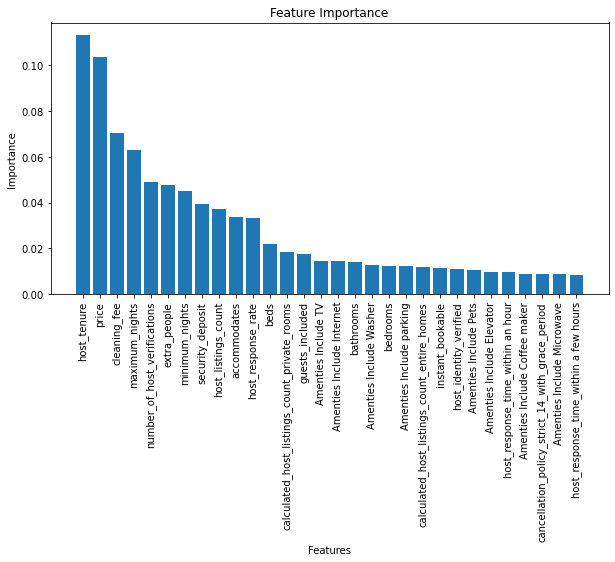

In [152]:
#Get feature importances
feature_mi = dt.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1][0:30]],feature_mi[featureinds[::-1][0:30]])
plt.xticks(X_train.columns.values[featureinds[::-1][0:30]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [153]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=dt.predict(X_train)
predictions_test=dt.predict(X_test)

#Compute accuracies
train_accuracy=accuracy_score(Y_train,predictions_train)
test_accuracy=accuracy_score(Y_test,predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9986184375784979
Test Accuracy is 0.5867872393870887


In [154]:
min_samples_split_values = np.arange(2,3500,350)
min_samples_leaf_values = np.arange(1,200,20)

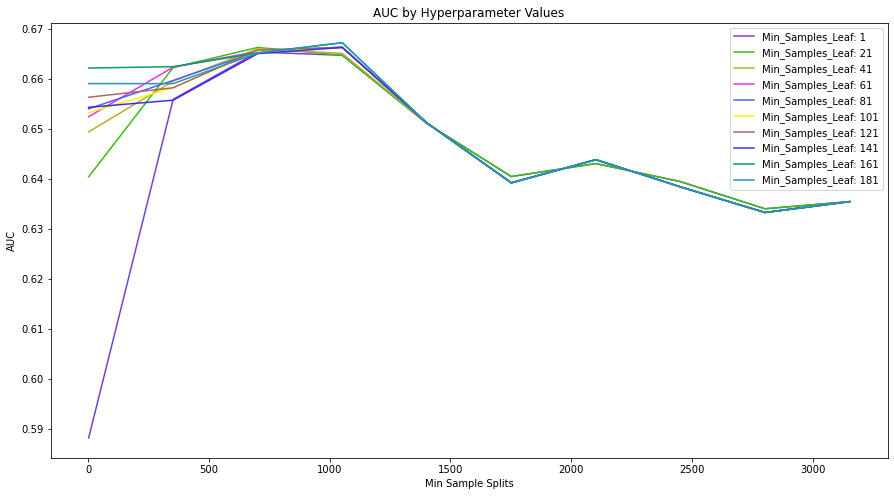

In [155]:
from sklearn import metrics

plt.figure(figsize=(15,8))
accuracies = dict()
aucs = dict()
#Go through each min leaf values
for leaf in min_samples_leaf_values:
    accuracies[leaf] = np.zeros(10)
    aucs[leaf] = np.zeros(10)
    #Go through each min split values
    for i, split in enumerate(min_samples_split_values):
        #build and fit a new decision tree with current hyperparameters
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=leaf, min_samples_split=split)
        dt.fit(X_train, Y_train)
        
        #Add accuracies to the dictionary
        accuracies[leaf][i] = accuracy_score(Y_test,dt.predict(X_test))
        predictions_dt = dt.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
        aucs[leaf][i] = metrics.auc(fpr,tpr)
        
    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    #Plot the accuracies for this leaf value with minimum split values on the x axis
    plt.plot(min_samples_split_values, aucs[leaf], color = c, label = "Min_Samples_Leaf: " + str(leaf))

#Add some finishing touches
plt.legend()
plt.xlabel('Min Sample Splits')
plt.ylabel('AUC')
plt.title('AUC by Hyperparameter Values')
plt.show()

In [156]:

max_accuracy = 0
max_auc = 0
max_leaf = 0
max_split = 0

#Loop through the dictionary to find which combination gives us the highest accuracy
for leaf in accuracies.keys():
    for i, split in enumerate(min_samples_split_values):
        if aucs[leaf][i] > max_auc:
            max_auc = aucs[leaf][i]
            max_leaf = leaf
            max_split = split

#print the highest Accuracy and Relevant Configuration            
print("Max AUC: " + str(max_auc))
print("Best Minimum Leaf Size: " + str(max_leaf))
print("Best Minimum Samples for Split: " + str(max_split))

Max AUC: 0.6672999617852208
Best Minimum Leaf Size: 161
Best Minimum Samples for Split: 1052


In [157]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=160, min_samples_split=1050)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

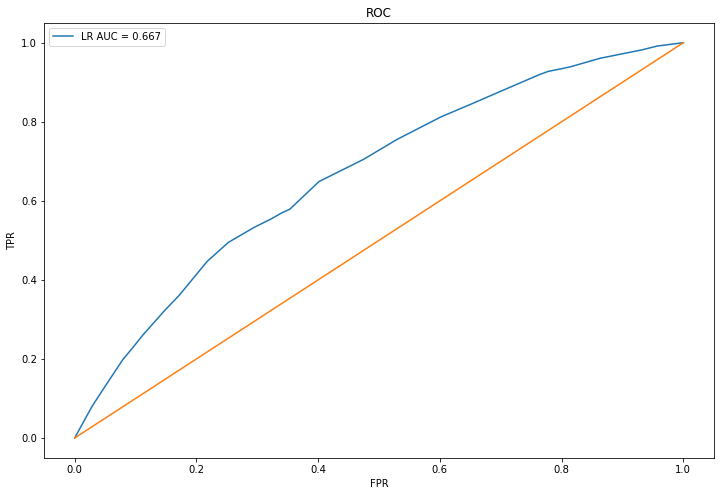

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "LR AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [159]:
X_UC = df_uncontrollable_sampled.drop(columns=['Label'])
Y_UC = df_uncontrollable_sampled['Label']

In [160]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=60, min_samples_split=1400)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_UC, Y_UC)

In [161]:
df_uncontrollable_full = pd.read_csv('../uncontrollable_cleaned_features.csv', index_col='id')

In [162]:
predictions_dt = dt.predict_proba(df_uncontrollable_full.drop(columns='Label'))[:,1]

In [163]:
df_uncontrollable_full['prediction'] = predictions_dt

In [164]:
df_controllable_sampled_new = df_controllable_sampled.merge(df_uncontrollable_full, left_index=True, right_index=True, how='left')

In [165]:
df_controllable_sampled_new

host_response_rate  host_listings_count  host_has_profile_pic  \
id                                                                          
5435.0              100.000000                  2.0                   1.0   
20311.0             100.000000                  1.0                   1.0   
27024.0             100.000000                  1.0                   1.0   
62264.0             100.000000                  2.0                   1.0   
70381.0              93.247853                  1.0                   1.0   
...                        ...                  ...                   ...   
39993302.0          100.000000                  6.0                   1.0   
40004982.0          100.000000                  0.0                   1.0   
40012805.0           97.000000                  5.0                   1.0   
40136807.0          100.000000                  0.0                   1.0   
40370819.0           99.000000                  2.0                   1.0   

            host_identity_verified  accommodates  bathrooms  bedrooms  beds  \
id                                                                            
5435.0                         0.0           2.0        1.0       1.0   1.0   
20311.0                        1.0           2.0        1.0       1.0   1.0   
27024.0                        1.0           4.0        1.0       1.0   3.0   
62264.0                        1.0           2.0        1.0       1.0   1.0   
70381.0                        0.0           5.0        2.0       3.0   3.0   
...                            ...           ...        ...       ...   ...   
39993302.0                     0.0           2.0        1.0       1.0   1.0   
40004982.0                     1.0           2.0        1.0       1.0   1.0   
40012805.0                     0.0           4.0        2.0       1.0   2.0   
40136807.0                     1.0           5.0        1.0       2.0   2.0   
40370819.0                     0.0           6.0        1.0       1.0   3.0   

            price  security_deposit  ...  neighbourhood_Westchester Village  \
id                                   ...                                      
5435.0      145.0          0.000000  ...                                  0   
20311.0      70.0        150.000000  ...                                  0   
27024.0     150.0          0.000000  ...                                  0   
62264.0      65.0        300.000000  ...                                  0   
70381.0     450.0        227.138887  ...                                  0   
...           ...               ...  ...                                ...   
39993302.0   70.0          0.000000  ...                                  0   
40004982.0   50.0          0.000000  ...                                  0   
40012805.0   59.0        100.000000  ...                                  0   
40136807.0  499.0          0.000000  ...                                  0   
40370819.0  249.0          0.000000  ...                                  0   

            neighbourhood_Westerleigh  neighbourhood_Whitestone  \
id                                                                
5435.0                              0                         0   
20311.0                             0                         0   
27024.0                             0                         0   
62264.0                             0                         0   
70381.0                             0                         0   
...                               ...                       ...   
39993302.0                          0                         0   
40004982.0                          0                         0   
40012805.0                          0                         0   
40136807.0                          0                         0   
40370819.0                          0                         0   

            neighbourhood_Williamsbridge  neighbourhood_Williamsburg  \
id        

In [166]:
df_controllable_sampled_new = df_controllable_sampled_new.drop(columns=['idpop_local_sum', 'idpop_citywide_sum',
       'idpop_local_food_sum', 'idpop_citywide_food_sum',
       'idpop_local_nightlife_sum', 'idpop_citywide_nightlife_sum',
       'idpop_local_travel_sum', 'idpop_citywide_travel_sum',
       'venue_count_500m', 'sub_cnt_20m', 'sub__line_cnt_20m', 'comp',
       'comp_hotel',
       'Demo % - ACS 2011 Means of transportation: Public transportation - Subway - Zipcode',
       'Demo % - Age - Age 00 - 14 - Zipcode - ACS 2011',
       'Demo % - Age - Age 15 - 29 - Zipcode - ACS 2011',
       'Demo % - Age - Age 30 - 44 - Zipcode - ACS 2011',
       'Demo % - Age - Age 45 - 59 - Zipcode - ACS 2011',
       'Demo % - Age - Age 60 + - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Bachelors Degree - Zipcode - ACS 2011',
       'Demo % - Education - Pop 25 yrs + Masters degree - Zipcode - ACS 2011',
       'Demo % - Ethnicity - Non-White Population - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 1-2 Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 3+ Persons - Zipcode - ACS 2011',
       'Demo % - Households - Household Size: 7 + Persons - Zipcode - ACS 2011',
       'Demo % - Income - Hhld Income $100,000 + % - Zipcode - ACS 2011',
       'Demo % - Population - Female Population - Zipcode - ACS 2011',
       'Demo % - Population - Male Population - Zipcode - ACS 2011',
       'Demo - Age - Median Age Total Population - Zipcode - ACS 2011',
       'Demo - Households - Median Household Income - Zipcode - ACS 2011',
       'Demo - Population Density - Total - Zipcode - ACS 2011',
       'Label_y', 'neighbourhood_Allerton', 'neighbourhood_Alphabet City',
       'neighbourhood_Annadale', 'neighbourhood_Arrochar',
       'neighbourhood_Astoria', 'neighbourhood_Bath Beach',
       'neighbourhood_Battery Park City', 'neighbourhood_Bay Ridge',
       'neighbourhood_Bay Terrace', 'neighbourhood_Baychester',
       'neighbourhood_Bayside', 'neighbourhood_Bedford Park',
       'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Belmont',
       'neighbourhood_Bensonhurst', 'neighbourhood_Bergen Beach',
       'neighbourhood_Boerum Hill', 'neighbourhood_Borough Park',
       'neighbourhood_Brighton Beach', 'neighbourhood_Bronxdale',
       'neighbourhood_Brooklyn', 'neighbourhood_Brooklyn Heights',
       'neighbourhood_Brooklyn Navy Yard', 'neighbourhood_Brownsville',
       'neighbourhood_Bushwick', 'neighbourhood_Canarsie',
       'neighbourhood_Carroll Gardens', 'neighbourhood_Castle Hill ',
       'neighbourhood_Castleton Corners', 'neighbourhood_Chelsea',
       'neighbourhood_Chinatown', 'neighbourhood_City Island',
       'neighbourhood_Civic Center', 'neighbourhood_Claremont',
       'neighbourhood_Clifton', 'neighbourhood_Clinton Hill',
       'neighbourhood_Cobble Hill', 'neighbourhood_College Point',
       'neighbourhood_Columbia Street Waterfront',
       'neighbourhood_Concord', 'neighbourhood_Concourse',
       'neighbourhood_Concourse Village', 'neighbourhood_Coney Island',
       'neighbourhood_Corona', 'neighbourhood_Country Club',
       'neighbourhood_Crotona', 'neighbourhood_Crown Heights',
       'neighbourhood_DUMBO', 'neighbourhood_Ditmars / Steinway',
       'neighbourhood_Dongan Hills', 'neighbourhood_Downtown Brooklyn',
       'neighbourhood_Dyker Heights', 'neighbourhood_East Elmhurst',
       'neighbourhood_East Flatbush', 'neighbourhood_East Harlem',
       'neighbourhood_East New York', 'neighbourhood_East Village',
       'neighbourhood_Eastchester', 'neighbourhood_Edenwald',
       'neighbourhood_Elm Park', 'neighbourhood_Elmhurst',
       'neighbourhood_Eltingville', 'neighbourhood_Financial District',
       'neighbourhood_Flatbush', 'neighbourhood_Flatiron District',
       'neighbourhood_Flatlands', 'neighbourhood_Flushing',
       'neighbourhood_Fordham', 'neighbourhood_Forest Hills',
       'neighbourhood_Fort Greene', 'neighbourhood_Fort Hamilton',
       'neighbourhood_Fort Wadsworth', 'neighbourhood_Fresh Meadows',
       'neighbourhood_Gerritsen Beach', 'neighbourhood_Glendale',
       'neighbourhood_Gowanus', 'neighbourhood_Gramercy Park',
       'neighbourhood_Graniteville', 'neighbourhood_Grant City',
       'neighbourhood_Grasmere', 'neighbourhood_Gravesend',
       'neighbourhood_Great Kills', 'neighbourhood_Greenpoint',
       'neighbourhood_Greenridge', 'neighbourhood_Greenwich Village',
       'neighbourhood_Greenwood Heights', 'neighbourhood_Grymes Hill',
       'neighbourhood_Hamilton Heights', 'neighbourhood_Harlem',
       "neighbourhood_Hell's Kitchen", 'neighbourhood_Highbridge',
       'neighbourhood_Hillcrest', 'neighbourhood_Howard Beach',
       'neighbourhood_Hudson Square', 'neighbourhood_Huguenot',
       'neighbourhood_Hunts Point', 'neighbourhood_Inwood',
       'neighbourhood_Jackson Heights', 'neighbourhood_Jamaica',
       'neighbourhood_Kensington', 'neighbourhood_Kew Garden Hills',
       'neighbourhood_Kingsbridge', 'neighbourhood_Kingsbridge Heights',
       'neighbourhood_Kips Bay', 'neighbourhood_Lefferts Garden',
       'neighbourhood_Lighthouse HIll', 'neighbourhood_Lindenwood',
       'neighbourhood_Little Italy', 'neighbourhood_Long Island City',
       'neighbourhood_Longwood', 'neighbourhood_Lower East Side',
       'neighbourhood_Manhattan', 'neighbourhood_Manhattan Beach',
       'neighbourhood_Marble Hill', 'neighbourhood_Mariners Harbor',
       'neighbourhood_Maspeth', 'neighbourhood_Meatpacking District',
       'neighbourhood_Melrose', 'neighbourhood_Middle Village',
       'neighbourhood_Midland Beach', 'neighbourhood_Midtown',
       'neighbourhood_Midtown East', 'neighbourhood_Midwood',
       'neighbourhood_Mill Basin', 'neighbourhood_Morningside Heights',
       'neighbourhood_Morris Heights', 'neighbourhood_Morris Park',
       'neighbourhood_Morrisania', 'neighbourhood_Mott Haven',
       'neighbourhood_Mount Eden', 'neighbourhood_Murray Hill',
       'neighbourhood_New Brighton', 'neighbourhood_New Dorp',
       'neighbourhood_New Dorp Beach', 'neighbourhood_New Springville',
       'neighbourhood_Noho', 'neighbourhood_Nolita',
       'neighbourhood_Norwood', 'neighbourhood_Ozone Park',
       'neighbourhood_Park Slope', 'neighbourhood_Park Versailles',
       'neighbourhood_Parkchester', 'neighbourhood_Pelham Bay',
       'neighbourhood_Pleasant Plains', 'neighbourhood_Port Morris',
       'neighbourhood_Port Richmond', 'neighbourhood_Prospect Heights',
       'neighbourhood_Queens', 'neighbourhood_Randall Manor',
       'neighbourhood_Red Hook', 'neighbourhood_Rego Park',
       'neighbourhood_Richmond Hill', 'neighbourhood_Ridgewood',
       'neighbourhood_Riverdale', 'neighbourhood_Roosevelt Island',
       'neighbourhood_Rosebank', 'neighbourhood_Rossville',
       'neighbourhood_Sea Gate', 'neighbourhood_Sheepshead Bay',
       'neighbourhood_Soho', 'neighbourhood_Soundview',
       'neighbourhood_South Beach', 'neighbourhood_South Ozone Park',
       'neighbourhood_South Street Seaport',
       'neighbourhood_Spuyten Duyvil', 'neighbourhood_St. George',
       'neighbourhood_Stapleton', 'neighbourhood_Staten Island',
       'neighbourhood_Sunnyside', 'neighbourhood_Sunset Park',
       'neighbourhood_The Bronx', 'neighbourhood_The Rockaways',
       'neighbourhood_Throgs Neck',
       'neighbourhood_Times Square/Theatre District',
       'neighbourhood_Tompkinsville', 'neighbourhood_Tottenville',
       'neighbourhood_Tremont', 'neighbourhood_Tribeca',
       'neighbourhood_Union Square', 'neighbourhood_University Heights',
       'neighbourhood_Upper East Side', 'neighbourhood_Upper West Side',
       'neighbourhood_Utopia', 'neighbourhood_Van Nest',
       'neighbourhood_Wakefield', 'neighbourhood_Washington Heights',
       'neighbourhood_West Brighton', 'neighbourhood_West Village',
       'neighbourhood_Westchester Village', 'neighbourhood_Westerleigh',
       'neighbourhood_Whitestone', 'neighbourhood_Williamsbridge',
       'neighbourhood_Williamsburg', 'neighbourhood_Windsor Terrace',
       'neighbourhood_Woodhaven', 'neighbourhood_Woodlawn',
       'neighbourhood_Woodside'])

In [167]:
df_controllable_sampled_new = df_controllable_sampled_new.rename(columns={'Label_x':'Label'})

In [168]:
df_controllable_sampled_new

host_response_rate  host_listings_count  host_has_profile_pic  \
id                                                                          
5435.0              100.000000                  2.0                   1.0   
20311.0             100.000000                  1.0                   1.0   
27024.0             100.000000                  1.0                   1.0   
62264.0             100.000000                  2.0                   1.0   
70381.0              93.247853                  1.0                   1.0   
...                        ...                  ...                   ...   
39993302.0          100.000000                  6.0                   1.0   
40004982.0          100.000000                  0.0                   1.0   
40012805.0           97.000000                  5.0                   1.0   
40136807.0          100.000000                  0.0                   1.0   
40370819.0           99.000000                  2.0                   1.0   

            host_identity_verified  accommodates  bathrooms  bedrooms  beds  \
id                                                                            
5435.0                         0.0           2.0        1.0       1.0   1.0   
20311.0                        1.0           2.0        1.0       1.0   1.0   
27024.0                        1.0           4.0        1.0       1.0   3.0   
62264.0                        1.0           2.0        1.0       1.0   1.0   
70381.0                        0.0           5.0        2.0       3.0   3.0   
...                            ...           ...        ...       ...   ...   
39993302.0                     0.0           2.0        1.0       1.0   1.0   
40004982.0                     1.0           2.0        1.0       1.0   1.0   
40012805.0                     0.0           4.0        2.0       1.0   2.0   
40136807.0                     1.0           5.0        1.0       2.0   2.0   
40370819.0                     0.0           6.0        1.0       1.0   3.0   

            price  security_deposit  ...  Amenties Include Pets  \
id                                   ...                          
5435.0      145.0          0.000000  ...                      1   
20311.0      70.0        150.000000  ...                      0   
27024.0     150.0          0.000000  ...                      0   
62264.0      65.0        300.000000  ...                      0   
70381.0     450.0        227.138887  ...                      1   
...           ...               ...  ...                    ...   
39993302.0   70.0          0.000000  ...                      0   
40004982.0   50.0          0.000000  ...                      0   
40012805.0   59.0        100.000000  ...                      0   
40136807.0  499.0          0.000000  ...                      0   
40370819.0  249.0          0.000000  ...                      0   

            Amenties Include Dishes and silverware  \
id                                                   
5435.0                                           1   
20311.0                                          0   
27024.0                                          0   
62264.0                                          0   
70381.0                                          0   
...                                            ...   
39993302.0                                       1   
40004982.0                                       1   
40012805.0                                       0   
40136807.0                                       1   
40370819.0                                       1   

            Amenties Include Coffee maker  Amenties Include Microwave  \
id                                                                      
5435.0                                  1                           1   
20311.0                                 0                           0   
27024.0                                 0                           0   
62264.0                                 0 

In [169]:
from sklearn.model_selection import train_test_split

X = df_controllable_sampled_new.drop(columns=['Label'])
Y = df_controllable_sampled_new['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.80)

In [170]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50, min_samples_split=100)
dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

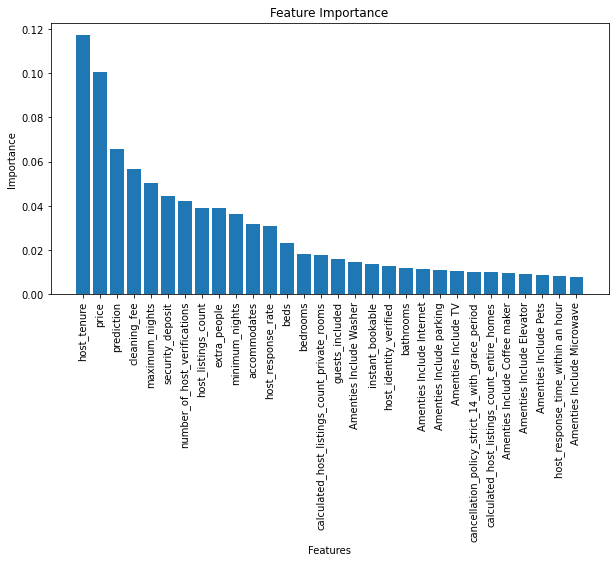

In [171]:
#Get feature importances
feature_mi = dt.feature_importances_

#Sort indices
featureinds = feature_mi.argsort()

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

#Plot features in order of importance
plt.bar(X_train.columns.values[featureinds[::-1][0:30]],feature_mi[featureinds[::-1][0:30]])
plt.xticks(X_train.columns.values[featureinds[::-1][0:30]],rotation="90")
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

In [172]:
from sklearn.metrics import accuracy_score

#Make predictions for both training and test data
predictions_train=dt.predict(X_train)
predictions_test=dt.predict(X_test)

#Compute accuracies
train_accuracy=accuracy_score(Y_train,predictions_train)
test_accuracy=accuracy_score(Y_test,predictions_test)

print("Training Accuracy is " + str(train_accuracy))
print("Test Accuracy is " + str(test_accuracy))

Training Accuracy is 0.9988068324541572
Test Accuracy is 0.57824667169053


In [173]:
min_samples_split_values = np.arange(2,2000,200)
min_samples_leaf_values = np.arange(1,200,20)

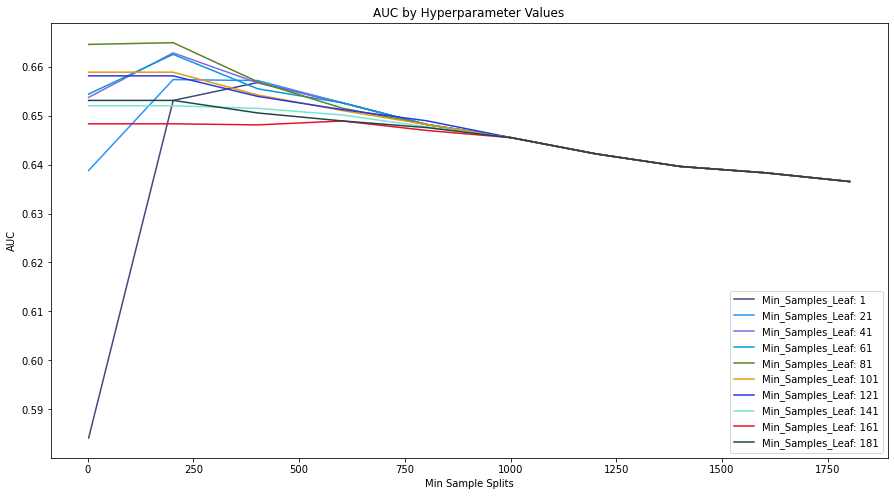

In [174]:
from sklearn import metrics

plt.figure(figsize=(15,8))
accuracies = dict()
aucs = dict()
#Go through each min leaf values
for leaf in min_samples_leaf_values:
    accuracies[leaf] = np.zeros(10)
    aucs[leaf] = np.zeros(10)
    #Go through each min split values
    for i, split in enumerate(min_samples_split_values):
        #build and fit a new decision tree with current hyperparameters
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=leaf, min_samples_split=split)
        dt.fit(X_train, Y_train)
        
        #Add accuracies to the dictionary
        accuracies[leaf][i] = accuracy_score(Y_test,dt.predict(X_test))
        predictions_dt = dt.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
        aucs[leaf][i] = metrics.auc(fpr,tpr)
        
    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    #Plot the accuracies for this leaf value with minimum split values on the x axis
    plt.plot(min_samples_split_values, aucs[leaf], color = c, label = "Min_Samples_Leaf: " + str(leaf))

#Add some finishing touches
plt.legend()
plt.xlabel('Min Sample Splits')
plt.ylabel('AUC')
plt.title('AUC by Hyperparameter Values')
plt.show()

In [175]:

max_accuracy = 0
max_auc = 0
max_leaf = 0
max_split = 0

#Loop through the dictionary to find which combination gives us the highest accuracy
for leaf in accuracies.keys():
    for i, split in enumerate(min_samples_split_values):
        if aucs[leaf][i] > max_auc:
            max_auc = aucs[leaf][i]
            max_leaf = leaf
            max_split = split

#print the highest Accuracy and Relevant Configuration            
print("Max AUC: " + str(max_auc))
print("Best Minimum Leaf Size: " + str(max_leaf))
print("Best Minimum Samples for Split: " + str(max_split))

Max AUC: 0.6648755892507492
Best Minimum Leaf Size: 81
Best Minimum Samples for Split: 202


In [176]:
#import the decision tree module from sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=80, min_samples_split=200)
#dt = DecisionTreeClassifier(criterion = 'entropy')
fit = dt.fit(X_train, Y_train)

dt_2 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=80, min_samples_split=200)
fit = dt_2.fit(X_train.drop(columns='prediction'), Y_train)

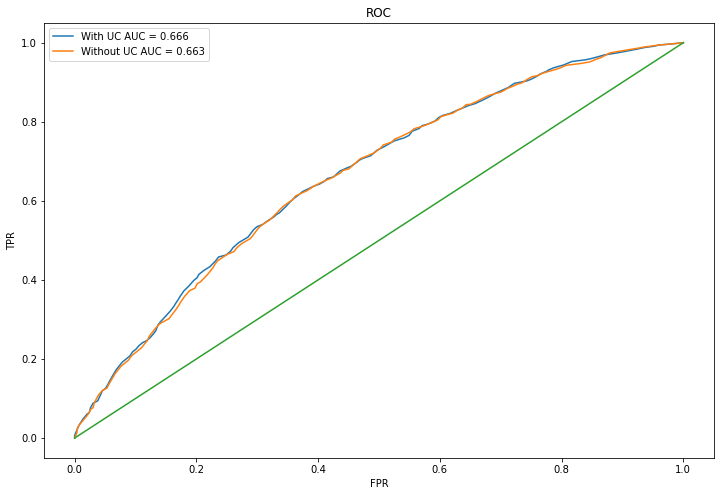

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, svm, metrics

#lr_model = linear_model.LogisticRegression(C=1e30)
#lr_model.fit(X_train, Y_train)
#predictions_lr = lr_model.predict_proba(X_test)[:,1]
predictions_dt = dt.predict_proba(X_test)[:,1]
predictions_dt_2 = dt_2.predict_proba(X_test.drop(columns='prediction'))[:,1]

#svm_model = svm.SVC(kernel="linear")
#svm_model.fit(X_train, Y_train)
#predictions_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(12,8))

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt)
auc = metrics.auc(fpr,tpr)
label = "With UC AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)

#Plot LR ROC/AUC
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions_dt_2)
auc = metrics.auc(fpr,tpr)
label = "Without UC AUC = %.3f"%auc
plt.plot(fpr,tpr,label = label)


#Plot 45 degree line
plt.plot([0,1],[0,1])

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()

In [178]:
#Feature Importance Exploration:

import sklearn.metrics as skm

def plotMI(dat, lab, width = 0.35, signed = 0):
	'''
	Draw a bar chart of the normalized MI between each X and Y
	'''
	X = dat.drop(lab, 1)
	Y = dat[[lab]].values
	cols = X.columns.values
	mis = []

	#Start by getting MI
	for c in cols:
		mis.append(skm.normalized_mutual_info_score(Y.ravel(), X[[c]].values.ravel()))

	#Get signs by correlation
	corrs = dat.corr()[lab]
	corrs[corrs.index != lab]
	df = pd.DataFrame(list(zip(mis, cols)), columns = ['MI', 'Lab'])
	df2 = pd.concat([df, pd.DataFrame(list(corrs), columns = ['corr'])], axis=1)
	df2 = df2.reindex(df.index)


	
	if signed == 0:
		makeBar(df2, 'MI', 'Lab', width)

	else:
		makeBarSigned(df2, 'MI', 'Lab', width)


def makeBarSigned(df, h, lab,  width):
	'''
	Contains
	'''
	df_s = df.sort_values(by = [h], ascending = False)

	#Get a barplot
	ind = np.arange(df_s.shape[0])
	labs = df_s[[lab]].values.ravel()
	h_pos = (df_s[['corr']].values.ravel() > 0) * df_s.MI
	h_neg = (df_s[['corr']].values.ravel() < 0) * df_s.MI

	fig = plt.figure(facecolor = 'w', figsize = (12, 6))
	ax = plt.subplot(111)
	plt.subplots_adjust(bottom = 0.25)

	rec = ax.bar(ind + width, h_pos, width, color='r', label = 'Positive')
	rec = ax.bar(ind + width, h_neg, width, color='b', label = 'Negative')

	ax.set_xticks(ind + getTickAdj(labs, width))
	ax.set_xticklabels(labs, rotation = 90, size = 10)

	plt.legend()
    

def makeBar(df, h, lab,  width):
	'''
	Contains
	'''
	df_s = df.sort_values(by = [h], ascending = False)

	#Get a barplot
	ind = np.arange(df_s.shape[0])
	labs = df_s[[lab]].values.ravel() 

	fig = plt.figure(facecolor = 'w', figsize = (12, 6))
	ax = plt.subplot(111)
	plt.subplots_adjust(bottom = 0.25)

	rec = ax.bar(ind + width, df_s[h].values, width, color='r')

	ax.set_xticks(ind + getTickAdj(labs, width))
	ax.set_xticklabels(labs, rotation = 90, size = 10)
    
def getTickAdj(labs, width):
	lens = list(map(len, labs))
	lens = -1 * width * (lens - np.mean(lens)) / np.max(lens)
	return lens

Text(0.5, 1.0, 'Mutual Information Between Variable X and Label')

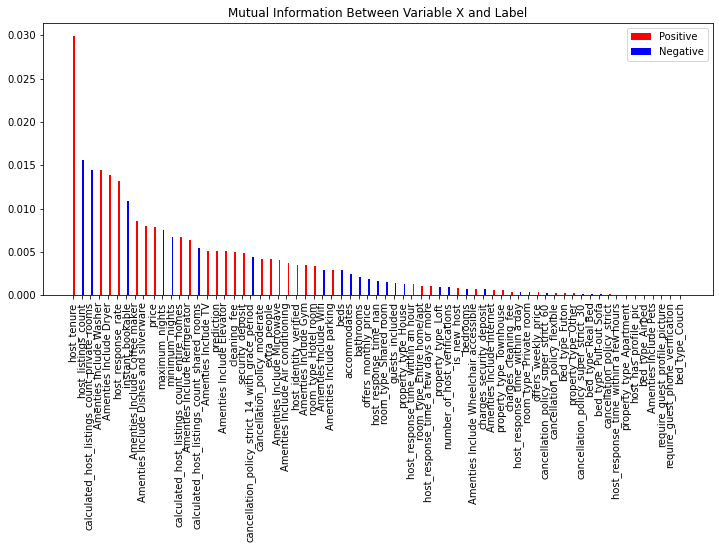

In [180]:
plotMI(df_controllable_sampled_new, 'Label', 0.2, signed=1)
plt.title('Mutual Information Between Variable X and Label')